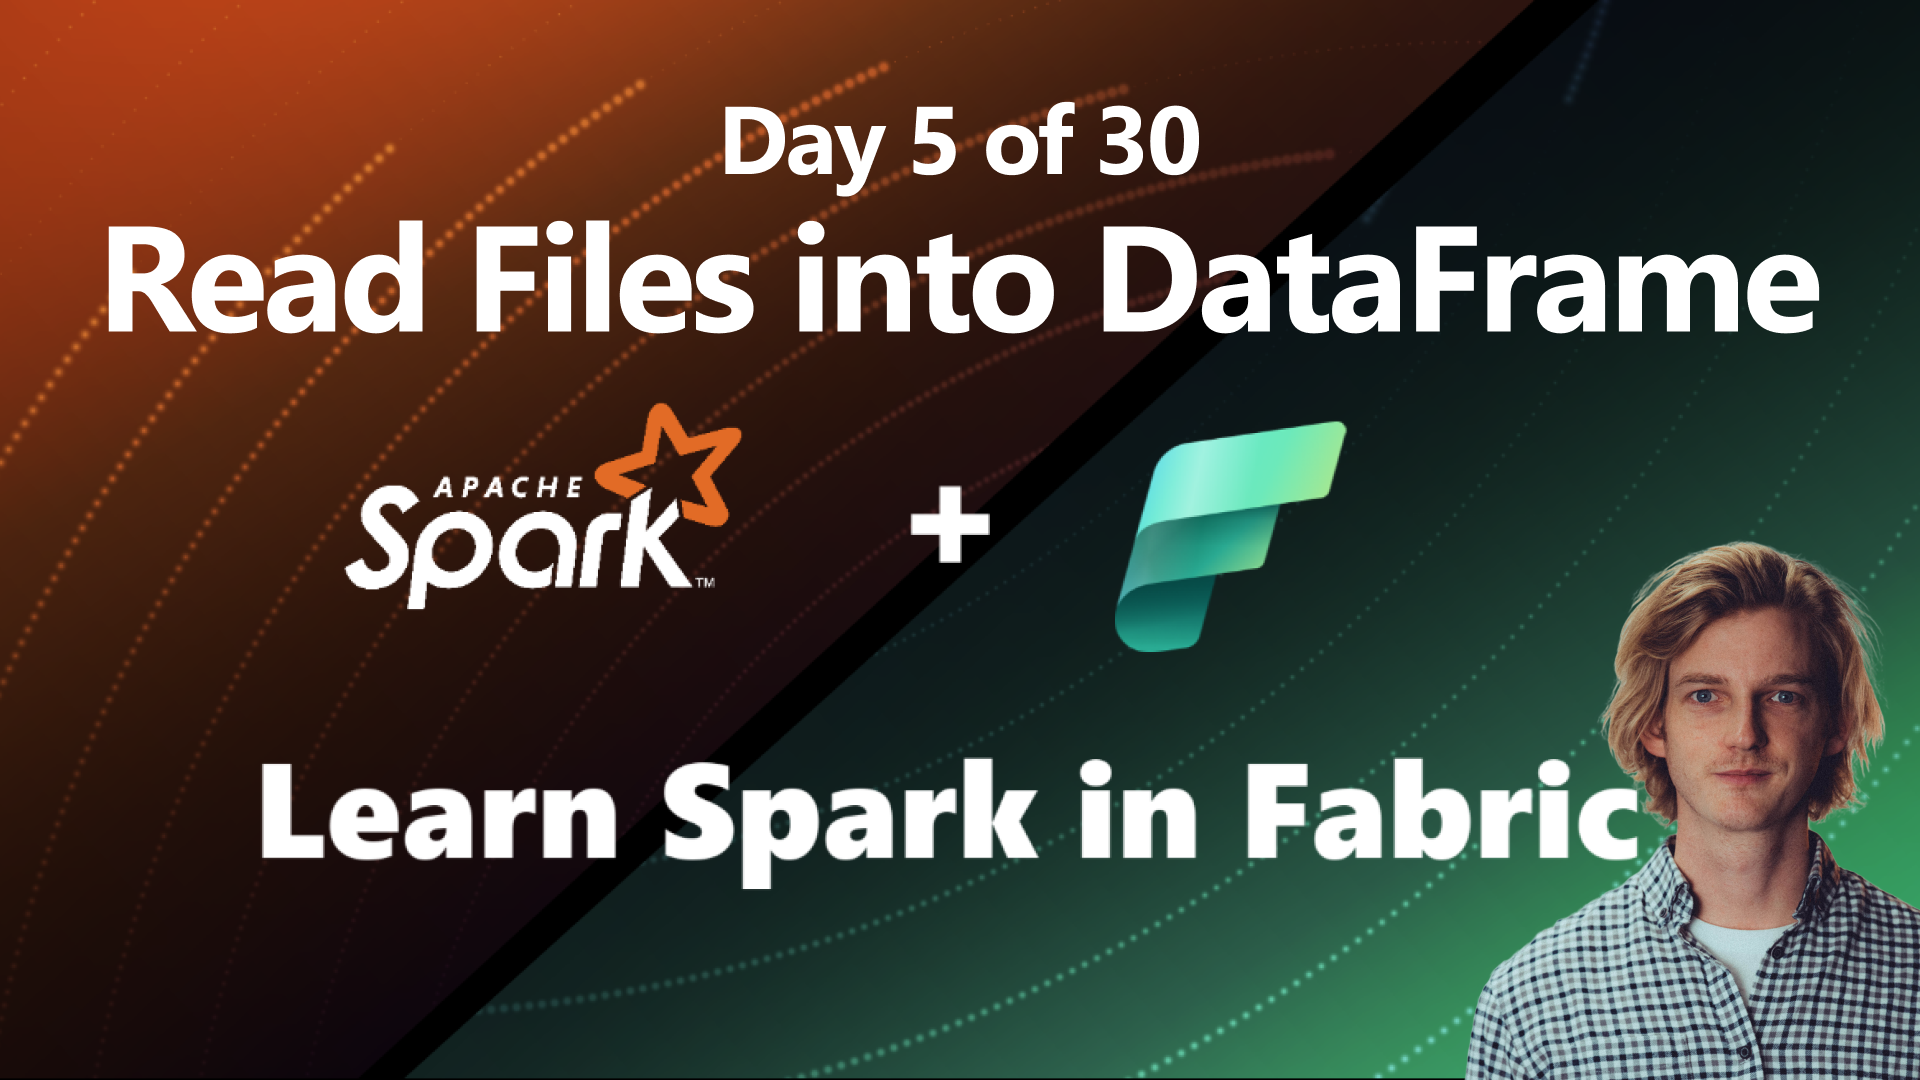

## Reading a CSV file into a Spark DataFrame
- Basic read
- with headers, 
- inferring the schema 


Using property-sales.csv, which looks like this: 

Address,Type,City,SalePrice ($),Agent

1 Rowley Street ,Detached House,New York,745000,Penelope Pullman 

13a lollipop avenue,Apartment,Los Angeles,345000,Jack Smith 

34 the drive,House,Atlanta,459000,Sheila Sammi

In [ ]:
# Declare the path to our file 
csv_path = 'Files/property-sales.csv' 

# Read a csv file from Files/property-sales.csv
df_csv = spark.read.csv(csv_path, header=True) 

display(df_csv)

In [ ]:
df_csv.write.mode("overwrite").format("csv").save("Files/ " + csv_table_name)


In [ ]:
df_csv.dtypes

## Writing DataFrames to files (JSON) 
We can write out our DataFrame as a JSON file by calling df.write.json() 

In [ ]:
# call write.json() on our 
df_csv.write.json("Files/json/property-sales.json", mode='overwrite')


## Reading from JSON File into DataFrame

In [ ]:
df_json = spark.read.json('Files/json/property-sales.json')
display(df_json)

## Writing out to parquet

In [ ]:
df_json.write.parquet('Files/parquet/property-sales2.parquet', mode='overwrite')

Reading in parquet into a DataFrame

In [ ]:
df_parquet = spark.read.parquet('Files/parquet/property-sales.parquet')
display(df_parquet)

## Reading multiple files in the same folder
- creating multiple parquet files in the parquet subfolder first
- read in all the parquet files into one df 

In [ ]:
# read all the parquet files in the 'Files/parquet/' folder into a dataframe  
df_all_parquet = spark.read.parquet('Files/parquet/*.parquet')

## Checking this has worked using _metadata
Spark provides us with all the file metadata in a 'hidden' column that we can add to our dataframe using _metadata. 

In [ ]:
# read all the parquet files, then add the _metadata column 
df_all_parquet_plus_metadata = spark.read\
    .parquet('Files/parquet/*.parquet')\
    .select("*", "_metadata")

display(df_all_parquet_plus_metadata)

## Further learning
Check out the relevant part of the [Spark documentation](https://spark.apache.org/docs/latest/sql-data-sources-generic-options.html) to read about more complex data reading scenarios, like: 
- Ignoring corrupt/ missing files
- Custom path filtering (PathGlobFilter) 
- More recursive file reading patterns within complex folder structures. 



---
#### ✅ View this notebook and all others in this series on GitHub. 
#### ✅ Leave a comment below
#### ✅ Subscribe 
#### ✅ Like
